## **분석 목표 및 예상 결과물**
---

**분석 목표**

고객의 추가구매 유도를 위한 방안 수립

> 분석 방법론
1. Time Decay를 활용해 고객별 선호 카테고리 생성
2. MBTI 활용해 고객 세그먼트

> 예상 결과물
1. 다잇다 쇼핑몰의 매출 트렌드, 고객 구매 활동성을 분석을 통해 타겟 마케팅 전략 수립

## 1. Time Decay를 활용해 고객별 선호 카테고리 생성

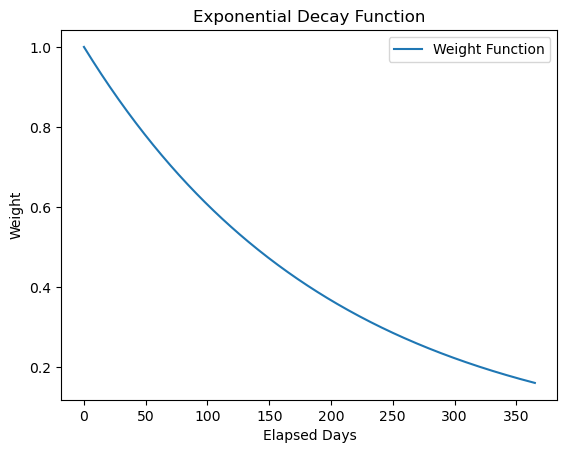

In [1]:
# Time Decay Concept

import matplotlib.pyplot as plt
import numpy as np

# 경과일수 생성 (예: 0부터 365까지의 경과일수)
elapsed_days = np.arange(0, 366, 1)

# 가중치 계산 (0.995^경과일수)
weights = 0.995**elapsed_days

# 그래프 그리기
plt.plot(elapsed_days, weights, label='Weight Function')
plt.title('Exponential Decay Function')
plt.xlabel('Elapsed Days')
plt.ylabel('Weight')
plt.legend()
plt.show()

구매가 오래된 상품일수록, 가중치를 조정해 고객 별 최선호 아이템 조사

In [ ]:
## 파일 참조, 실행 후 지워야 가독성이 생깁니다.
%run "C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.11/쇼핑몰 플랫폼 분석 - RFM.ipynb"

In [3]:
customer

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day_of_week,age_grp
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,Monday,65over
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,Monday,45-50
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,Thursday,35-40
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,Thursday,41-45
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,Wednesday,45-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021-06-01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300,Tuesday,45-50
147307,2019124982759,40.0,2,202104155934763,2021-04-15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600,Thursday,41-45
147308,2019083044089,38.0,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360,Friday,35-40
147309,2019010788799,67.0,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500,Wednesday,65over


In [4]:
# 추천을 제공하는 날짜가 이 데이터의 가장 마지막 구매 일자의 다음 날이라고 가정
recommend_ymd = customer['order_date'].max() + pd.Timedelta(days=1)
print(recommend_ymd)

2021-06-25 00:00:00


In [5]:
## 유저별 데이터 집계
decay_summary = customer.groupby(['customer_no', 'order_date', 'item_category'])['order_no'].nunique().reset_index()
decay_summary = decay_summary.rename(columns={'order_no': 'cnt_order'})
decay_summary

,customer_no,order_date,item_category,cnt_order
0,2015010000596,2021-01-15,일반식품,1
1,2015010000596,2021-06-03,생활가전,1
2,2015010000652,2021-03-06,일반식품,1
3,2015010001152,2021-02-13,일반식품,1
4,2015010001152,2021-02-18,일반식품,1
...,...,...,...,...
133826,2021069984125,2021-06-04,레포츠패션,1
133827,2021069986151,2021-06-04,레포츠패션,1
133828,2021069994005,2021-06-08,레포츠패션,1
133829,2021069994853,2021-06-04,레포츠패션,1


In [6]:
## 파라미터 설정
day_parameter = 0.995

## Time Decay 적용 컬럼 생성
decay_summary['decay_day'] = day_parameter ** ((recommend_ymd - decay_summary['order_date']).dt.days)
decay_summary

,customer_no,order_date,item_category,cnt_order,decay_day
0,2015010000596,2021-01-15,일반식품,1,0.446186
1,2015010000596,2021-06-03,생활가전,1,0.895587
2,2015010000652,2021-03-06,일반식품,1,0.573274
3,2015010001152,2021-02-13,일반식품,1,0.515996
4,2015010001152,2021-02-18,일반식품,1,0.529092
...,...,...,...,...,...
133826,2021069984125,2021-06-04,레포츠패션,1,0.900087
133827,2021069986151,2021-06-04,레포츠패션,1,0.900087
133828,2021069994005,2021-06-08,레포츠패션,1,0.918316
133829,2021069994853,2021-06-04,레포츠패션,1,0.900087


1일이 지날떄마다 가중치가 0.05% 씩 감소하도록 설정하였습니다.

In [7]:
## decay_day 집계
user_decay_summary = decay_summary.groupby(['customer_no', 'item_category']).agg(cnt_order = ('cnt_order', 'sum'),
                                                                             decay_day = ('decay_day', 'sum')).reset_index()

user_decay_summary

,customer_no,item_category,cnt_order,decay_day
0,2015010000596,생활가전,1,0.895587
1,2015010000596,일반식품,1,0.446186
2,2015010000652,일반식품,1,0.573274
3,2015010001152,건강식품,1,0.732877
4,2015010001152,일반식품,5,3.087330
...,...,...,...,...
78666,2021069984125,레포츠패션,1,0.900087
78667,2021069986151,레포츠패션,1,0.900087
78668,2021069994005,레포츠패션,1,0.918316
78669,2021069994853,레포츠패션,1,0.900087


In [8]:
## decay_day 값이 큰 아이템별로 순위 매기기
user_decay_summary['rn'] = user_decay_summary.sort_values(by='decay_day', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_decay_summary

,customer_no,item_category,cnt_order,decay_day,rn
0,2015010000596,생활가전,1,0.895587,1
1,2015010000596,일반식품,1,0.446186,2
2,2015010000652,일반식품,1,0.573274,1
3,2015010001152,건강식품,1,0.732877,2
4,2015010001152,일반식품,5,3.087330,1
...,...,...,...,...,...
78666,2021069984125,레포츠패션,1,0.900087,1
78667,2021069986151,레포츠패션,1,0.900087,1
78668,2021069994005,레포츠패션,1,0.918316,1
78669,2021069994853,레포츠패션,1,0.900087,1


In [9]:
## Time decay 적용한 최선호 구매 아이템 정보만 남기기
user_decay_item_info = user_decay_summary[user_decay_summary['rn'] == 1].reset_index(drop = True)
user_decay_item_info

,customer_no,item_category,cnt_order,decay_day,rn
0,2015010000596,생활가전,1,0.895587,1
1,2015010000652,일반식품,1,0.573274,1
2,2015010001152,일반식품,5,3.087330,1
3,2015010001213,건강식품,1,0.547986,1
4,2015010001954,여성의류,1,0.564717,1
...,...,...,...,...,...
72021,2021069984125,레포츠패션,1,0.900087,1
72022,2021069986151,레포츠패션,1,0.900087,1
72023,2021069994005,레포츠패션,1,0.918316,1
72024,2021069994853,레포츠패션,1,0.900087,1


>재사용을 위한 Class 생성

In [11]:
import pandas as pd

class CustomerPreference:
    def __init__(self, customer_data, day_decay_parameter=0.995):
        """
        고객 선호도 분석을 위한 클래스 초기화
        :param customer_data: 고객 구매 데이터 (DataFrame)
        :param day_decay_parameter: Time Decay를 위한 일별 감소 파라미터 (float)
        """
        self.customer_data = customer_data
        self.day_decay_parameter = day_decay_parameter
        self.recommend_date = self.customer_data['order_date'].max() + pd.Timedelta(days=1)
        self.user_decay_item_info = None

    def apply_time_decay(self):
        """
        Time Decay 모델 적용 및 고객별 최선호 아이템 카테고리 추출
        """
        # 유저별 데이터 집계
        decay_summary = self.customer_data.groupby(['customer_no', 'order_date', 'item_category'])['order_no'].nunique().reset_index()
        decay_summary.rename(columns={'order_no': 'cnt_order'}, inplace=True)
        
        # Time Decay 적용 컬럼 생성
        decay_summary['decay_day'] = self.day_decay_parameter ** ((self.recommend_date - decay_summary['order_date']).dt.days)

        # decay_day 집계
        user_decay_summary = decay_summary.groupby(['customer_no', 'item_category']).agg(
            cnt_order=('cnt_order', 'sum'),
            decay_day=('decay_day', 'sum')
        ).reset_index()

        # decay_day 값이 큰 아이템별로 순위 매기기
        user_decay_summary['rn'] = user_decay_summary.sort_values(by='decay_day', ascending=False) \
            .groupby('customer_no') \
            .cumcount() + 1

        # Time decay 적용한 최선호 구매 아이템 정보만 남기기
        self.user_decay_item_info = user_decay_summary[user_decay_summary['rn'] == 1].reset_index(drop=True)

    def get_preferred_items(self):
        """
        최선호 아이템 정보 반환
        :return: 고객별 최선호 아이템 카테고리 정보 (DataFrame)
        """
        if self.user_decay_item_info is None:
            self.apply_time_decay()
        return self.user_decay_item_info
    
preference_analyzer = CustomerPreference(customer)
print(preference_analyzer.get_preferred_items())

         customer_no item_category  cnt_order  decay_day  rn
0      2015010000596          생활가전          1   0.895587   1
1      2015010000652          일반식품          1   0.573274   1
2      2015010001152          일반식품          5   3.087330   1
3      2015010001213          건강식품          1   0.547986   1
4      2015010001954          여성의류          1   0.564717   1
...              ...           ...        ...        ...  ..
72021  2021069984125         레포츠패션          1   0.900087   1
72022  2021069986151         레포츠패션          1   0.900087   1
72023  2021069994005         레포츠패션          1   0.918316   1
72024  2021069994853         레포츠패션          1   0.900087   1
72025  2021069995629         레포츠패션          1   0.922931   1

[72026 rows x 5 columns]


In [10]:
user_decay_item_info_value = user_decay_item_info['item_category'].value_counts().reset_index()

fig = px.pie(user_decay_item_info_value, title = '아이템 카테고리 선호도', values = 'item_category', names ='index')
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
user_decay_item_info_value_2 = user_decay_item_info['item_category'].value_counts().reset_index()

fig = px.pie(user_decay_item_info_value_, title = '아이템 카테고리 선호도', values = 'item_category', names ='index')
fig.update_layout(width=800, height=600)
fig.show()

## 2. MBTI 활용해 고객 세그먼트

|성별 |M|F|
|-----|-|--|
|선호 카테고리| 20개 |
|선호 구매 요일대 |D|W|
|선호 플랫폼|E|T|
|구매 시간대 |O|A|

- 성별 : 남성(M) 여성(F)
- 선호 카테고리 계열 : 의류, 식품 , 가전, 리빙
- 선호 구매 요일대 : 평일 , 주말
- 선호 플랫폼 : 모바일 , TV

In [19]:
#분석용 데이터셋 생성
customer_seg = customer
customer_seg = customer_seg[['gender','item_category','day_of_week','channel']]
customer_seg

,gender,item_category,day_of_week,channel
0,9,캐쥬얼,Monday,TV
1,2,레포츠패션,Monday,TV
2,1,뷰티,Thursday,TV
3,9,건강식품,Thursday,TV
4,1,일반식품,Wednesday,TV
...,...,...,...,...
147306,9,건강식품,Tuesday,TV
147307,2,뷰티,Thursday,TV
147308,2,일반식품,Friday,Mobile
147309,1,일반식품,Wednesday,Mobile


In [27]:
#데이터셋 칼럼명 변경
customer_seg['gender'] = customer_seg['gender'].replace({1: 'M', 2: 'F', 9 : 'X'})
customer_seg['item_category'] = 
customer_seg

,gender,item_category,day_of_week,channel
0,X,캐쥬얼,Monday,TV
1,F,레포츠패션,Monday,TV
2,M,뷰티,Thursday,TV
3,X,건강식품,Thursday,TV
4,M,일반식품,Wednesday,TV
...,...,...,...,...
147306,X,건강식품,Tuesday,TV
147307,F,뷰티,Thursday,TV
147308,F,일반식품,Friday,Mobile
147309,M,일반식품,Wednesday,Mobile


In [ ]:
customer_seg['gender']

In [ ]:
의류 : 레포츠패션, 언더웨어, 패션잡화, 여성의류, 캐쥬얼, 키즈/유아 등, 남성의류
가전 : 대형가전, 생활가전, 주방가전
가구 : 침구, 가구/인터레어
식품 : 건강식품, 일반식품
용품 : 주방용품, 생활용품, 뷰티, 레저/스포츠, 여행, 상품권, 반려용품

In [14]:
user_decay_item_info

,customer_no,item_category,cnt_order,decay_day,rn
0,2015010000596,생활가전,1,0.895587,1
1,2015010000652,일반식품,1,0.573274,1
2,2015010001152,일반식품,5,3.087330,1
3,2015010001213,건강식품,1,0.547986,1
4,2015010001954,여성의류,1,0.564717,1
...,...,...,...,...,...
72021,2021069984125,레포츠패션,1,0.900087,1
72022,2021069986151,레포츠패션,1,0.900087,1
72023,2021069994005,레포츠패션,1,0.918316,1
72024,2021069994853,레포츠패션,1,0.900087,1
